<a href="https://colab.research.google.com/github/ZaynTawfik/Hierarchical-Co-Attention-VQA/blob/main/Hierarchical_Coattention_VQA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/VQA

/content/drive/My Drive/VQA


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 3.9MB 15.5MB/s 
     |████████████████████████████████| 450kB 46.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8ff45fb97127f627008645bec9b343923eee0b2716ce5ee8b51f3ac05b648ccb
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install silence_tensorflow

  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.1.1-cp36-none-any.whl size=3743 sha256=b844abf35bd2b2edfbebe5883925d05c0117af84387832723270ee07b00f8220
  Stored in directory: /root/.cache/pip/wheels/51/0b/35/cf3020764bee61daa81fa249df3a448e3806344a087fc12292
Successfully built silence-tensorflow


In [ ]:
import numpy as np
import pandas as pd
import re
import glob

import os
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
import tensorflow as tf
import silence_tensorflow.auto  # pylint: disable=unused-import
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import sequence

from models.arch import build_model
from models.layers import ContextVector, PhraseLevelFeatures, AttentionMaps
from utils.load_pickles import tok, labelencoder
from utils.helper_functions import image_feature_extractor, process_sentence, predict_answers

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

**Storing all the variables needed for the model**

In [ ]:
max_answers = 1000
max_seq_len = 22
vocab_size  = len(tok.word_index) + 1
dim_d       = 512
dim_k       = 256
l_rate      = 1e-4
d_rate      = 0.5
reg_value   = 0.01
MODEL_PATH = 'pickles/complete_model.h5'
IMAGE_PATH = 'static'

custom_objects = {
    'PhraseLevelFeatures': PhraseLevelFeatures,
    'AttentionMaps': AttentionMaps,
    'ContextVector': ContextVector
    }


**Loading the saved model and the pretrained VGG19 model**

In [ ]:
# load the model
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
vgg_model = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(3, 224, 224)))


Tensor("PhraseLevelFeatures/Max:0", shape=(None, 22, 512), dtype=float32)
80142336/80134624 [==============================] - 3s 0us/step


**Predict Function**

> Extracts the question and image features given as input and passes these features onto the model.

> Output is the answer predicted by the model





In [ ]:
def predict(img,que):

  img_feat = image_feature_extractor(img, vgg_model)

  questions_processed = pd.Series(que).apply(process_sentence)

  question_data = tok.texts_to_sequences(questions_processed)
  
  question_data = sequence.pad_sequences(question_data, \
                                               maxlen=max_seq_len,\
                                               padding='post')
  
  
  y_predict = predict_answers(img_feat, question_data, model, labelencoder)
  return y_predict

**Pass the image and question to the predict function**

Saving WhatsApp Image 2020-06-12 at 8.06.47 PM.jpeg to WhatsApp Image 2020-06-12 at 8.06.47 PM.jpeg


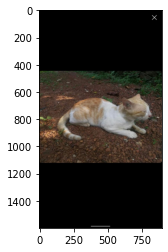

In [ ]:
uploaded = files.upload()
for i in uploaded.keys():
  img = i
 
imgage=mpimg.imread(img)
imgplot = plt.imshow(imgage)

In [ ]:
que='whatis in it'
ans = predict(img,que)

print(ans[0])

tf.Tensor(
[[[-2.6929173  92.126465   91.90936    ... 11.27065    57.260567
   29.096218  ]
  [-5.305053   70.679115   67.04755    ...  1.7943927  -3.810407
   19.873903  ]
  [ 4.9216013  -0.33892676  0.13530193 ...  1.4689959   1.1079344
   -0.1748013 ]
  ...
  [ 2.413405   -3.1237774  -0.60139984 ...  0.49709252  0.5785825
   -0.25264752]
  [ 2.413405   -3.1237774  -0.60139984 ...  0.49709252  0.5785825
   -0.25264752]
  [ 1.5589046  -2.587357   -0.60139984 ...  0.49709252  0.47446018
   -0.25264752]]], shape=(1, 22, 512), dtype=float32)
soccer ball


**Plot the image**

**Plot the image,question and answer**

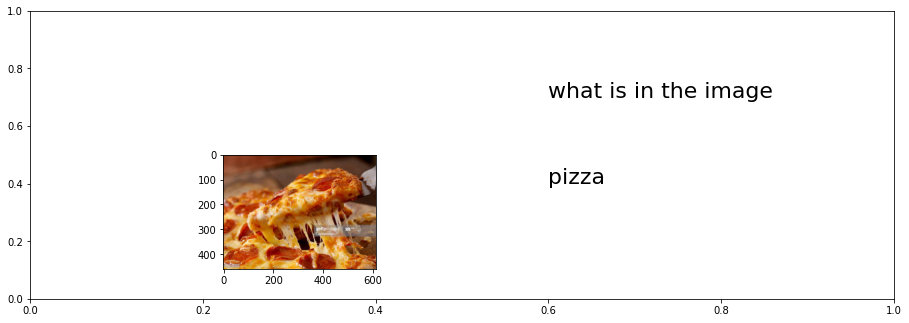

In [ ]:
%matplotlib inline


fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 2, 1))
a = fig.add_subplot(122)
imgplot = plt.imshow(imgage)

# a = fig.add_subplot(211)
# imgplot = fig.imshow(img)
fig.text(0.6, 0.7, que,  transform=ax.transAxes,size=22)
fig.text(0.6, 0.4, ans[0],  transform=ax.transAxes,size=22)
plt.show()

